In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import csv
import pickle
import libs.utils as utils
import libs.handle.dataset as handle_dataset
import spikeinterface as si
import spikeinterface.extractors as se
from spikeinterface.preprocessing import get_motion_parameters_preset, get_motion_presets


c:\Users\Sugimoto\Code\tc2025_shysgmt\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  
print(torch.cuda.get_device_name(0))  

2.5.1+cu121
True
NVIDIA GeForce RTX 3050


In [2]:
session_dir = r'Z:\Temp\RSS033_241101_153102'

In [66]:
session = handle_dataset.Session(session_dir)

In [75]:
# Extract dataset of target probe
i_imec = 0
session.add_sorting_analyzer(i_imec=i_imec)
session.add_analyzer_clean(i_imec=i_imec)

In [ ]:
#エラーで読み込めない
#sorting_analyzer = session.analyzer_clean
#metrics_df = sorting_analyzer.extensions['quality_metrics'].get_data()

In [99]:
# load metrics.csv
base_dir = session.sorting_analyzer_dir
path = os.path.join(base_dir, 'extensions', 'quality_metrics', 'metrics.csv')
metrics = pd.read_csv(path, index_col=0)
metrics

,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,amplitude_median,amplitude_cv_median,amplitude_cv_range
0,0.134364,0.388889,inf,0.000000,0.0,0.000000,0.0,NaN,0.0,-5979.003906,NaN,NaN
1,8.802894,1.000000,inf,1.272740,1918.0,1.000000,1127.0,NaN,0.0,-5979.003906,NaN,NaN
2,12.804336,0.925926,inf,3.189065,10168.0,1.000000,6923.0,NaN,0.0,-5979.003906,NaN,NaN
3,0.144545,0.462963,inf,0.000000,0.0,0.000000,0.0,NaN,0.0,-5979.003906,NaN,NaN
4,0.182802,0.194444,inf,0.000000,0.0,0.000000,0.0,NaN,0.0,-5979.003906,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.135906,0.703704,inf,0.000000,0.0,0.000000,0.0,NaN,0.0,-5979.003906,0.0,8.166599e-08
905,0.240188,0.537037,inf,78.436991,88.0,1.000000,157.0,NaN,0.0,-5979.003906,NaN,NaN
906,0.521565,0.953704,inf,11.908736,63.0,1.000000,108.0,NaN,0.0,-5979.003906,NaN,NaN
907,1.434188,1.000000,inf,0.224995,9.0,0.310789,7.0,0.325,0.0,-5979.003906,NaN,NaN


<Axes: xlabel='firing_rate', ylabel='Count'>

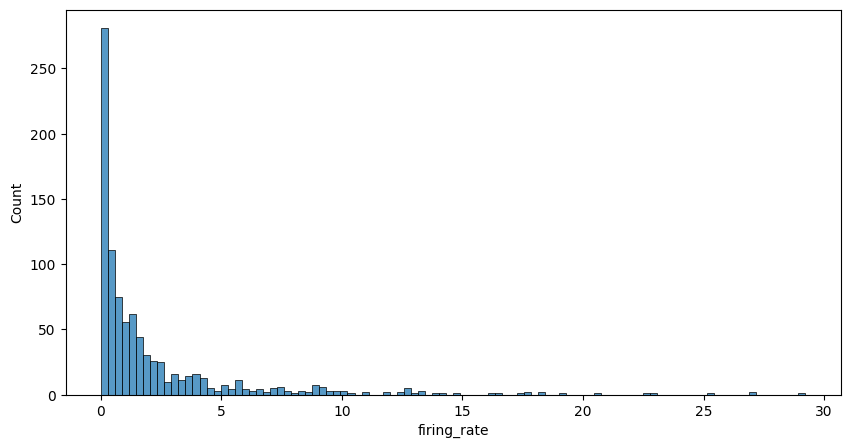

In [100]:
# plot histogram
bins = np.arange(0, 5, 0.5)
bins = 100

data = metrics['firing_rate']

plt.figure(figsize=(10, 5))    
sns.histplot(
    data=data, 
    bins=bins,
)

In [101]:
# load metrics.csv (cleaned)
base_dir = session.analyzer_clean_base_dir
path = os.path.join(base_dir, 'extensions', 'quality_metrics', 'metrics.csv')
metrics_clean = pd.read_csv(path, index_col=0)
metrics_clean

,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,amplitude_median,amplitude_cv_median,amplitude_cv_range
9,17.264712,0.990741,inf,0.085394,495.0,0.079216,294.0,0.065,0.0,-5979.003906,NaN,NaN
26,8.333933,0.981481,inf,0.004442,6.0,0.002224,2.0,0.010,0.0,-5979.003906,NaN,NaN
37,3.271621,1.000000,inf,0.033629,7.0,0.051784,7.0,0.050,0.0,-5979.003906,NaN,NaN
43,1.842524,0.962963,inf,0.060587,4.0,0.095434,4.0,0.055,0.0,-5979.003906,NaN,NaN
55,9.277409,1.000000,inf,0.063328,106.0,0.070599,76.0,0.065,0.0,-5979.003906,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
890,2.316267,1.000000,inf,0.182104,19.0,0.090340,6.0,0.155,0.0,-5979.003906,0.000000e+00,8.166599e-08
895,2.528071,1.000000,inf,0.160914,20.0,0.216542,16.0,0.220,0.0,-5979.003906,8.166600e-08,1.388322e-07
896,1.360913,1.000000,inf,0.055528,2.0,0.042551,1.0,0.150,0.0,-5979.003906,8.166600e-08,1.633320e-07
898,1.562073,1.000000,inf,0.147516,7.0,0.099813,3.0,0.170,0.0,-5979.003906,NaN,NaN


In [102]:
# load unit_location.npy
base_dir = session.sorting_analyzer_dir
path = os.path.join(base_dir, 'extensions', 'unit_locations', 'unit_locations.npy')
temp = np.load(path, allow_pickle=True).tolist()
unit_locations = pd.DataFrame(temp, columns=['x', 'y', 'z'])
unit_locations


,x,y,z
0,1404.553110,114.161391,1.000001
1,1406.932094,49.521342,1.001624
2,1010.868802,247.383703,1.000005
3,1366.822531,190.940907,1.000047
4,1296.280744,132.340286,1.000015
...,...,...,...
904,1227.540329,244.566220,1.000000
905,1166.947186,132.724243,1.000000
906,1193.416428,73.602499,1.000003
907,1355.215030,-202.733030,1.000005


In [103]:
# concat metrics and unit_locations
unit_infomation = metrics.join(unit_locations)

In [104]:
unit_infomation['unit_quality'] = metrics.index.isin(metrics_clean.index)
unit_infomation['unit_quality'] = unit_infomation['unit_quality'].map({True: 'Good', False: 'Bad'})
unit_infomation


,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,amplitude_median,amplitude_cv_median,amplitude_cv_range,x,y,z,unit_quality
0,0.134364,0.388889,inf,0.000000,0.0,0.000000,0.0,NaN,0.0,-5979.003906,NaN,NaN,1404.553110,114.161391,1.000001,Bad
1,8.802894,1.000000,inf,1.272740,1918.0,1.000000,1127.0,NaN,0.0,-5979.003906,NaN,NaN,1406.932094,49.521342,1.001624,Bad
2,12.804336,0.925926,inf,3.189065,10168.0,1.000000,6923.0,NaN,0.0,-5979.003906,NaN,NaN,1010.868802,247.383703,1.000005,Bad
3,0.144545,0.462963,inf,0.000000,0.0,0.000000,0.0,NaN,0.0,-5979.003906,NaN,NaN,1366.822531,190.940907,1.000047,Bad
4,0.182802,0.194444,inf,0.000000,0.0,0.000000,0.0,NaN,0.0,-5979.003906,NaN,NaN,1296.280744,132.340286,1.000015,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.135906,0.703704,inf,0.000000,0.0,0.000000,0.0,NaN,0.0,-5979.003906,0.0,8.166599e-08,1227.540329,244.566220,1.000000,Bad
905,0.240188,0.537037,inf,78.436991,88.0,1.000000,157.0,NaN,0.0,-5979.003906,NaN,NaN,1166.947186,132.724243,1.000000,Bad
906,0.521565,0.953704,inf,11.908736,63.0,1.000000,108.0,NaN,0.0,-5979.003906,NaN,NaN,1193.416428,73.602499,1.000003,Bad
907,1.434188,1.000000,inf,0.224995,9.0,0.310789,7.0,0.325,0.0,-5979.003906,NaN,NaN,1355.215030,-202.733030,1.000005,Bad


<Axes: xlabel='x', ylabel='y'>

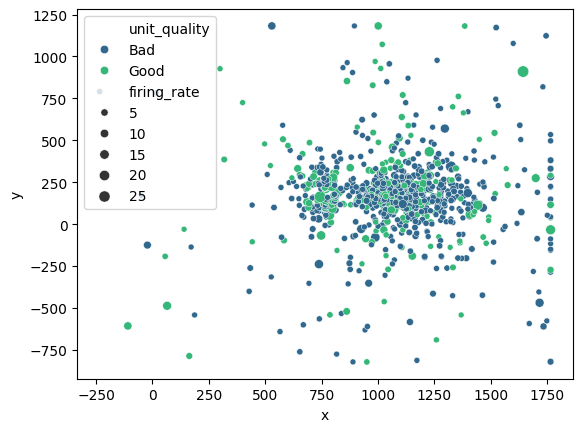

In [105]:
sns.scatterplot(
    data=unit_infomation,
    x='x',
    y='y',
    hue='unit_quality',
    size='firing_rate',
    palette='viridis')